<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/decades_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данный код использовался для исследования упоминаний разных тем в разные десятилетия.

## Подготовка и загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df = pd.read_excel(fname)

## Функции для очистки данных от нетекстовых значений и определения десятилетия исходя из года, а также их применение 

In [ ]:
def decade(date):
  if len(date.split('.')) !=3:
      year = 'xxxx'
  else:
      year = date.split('.')[2][:3]
  return year

In [ ]:
def nonans(t):
  if type(t) is float:
    t = 'нет данных'
  return t

In [ ]:
df['decade'] = df['date'].apply(decade)

In [ ]:
decthem = df[['decade', 'theme']]
decthem['theme_corr'] = decthem['theme'].apply(nonans)
themes = decthem['theme_corr']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Создание словаря встречаемости для каждой отдельной темы и датафрейма частотности упоминания на основе этого словаря

In [ ]:
topics = []
for theme in themes:
  theme = str(theme).split(', ')
  for t in theme:
    if t not in topics:
      topics.append(t)
for topic in topics:
  tt = []
  for theme in themes:
    if topic in theme:
      tt.append(1)
    else:
      tt.append(0)
  decthem[topic] = tt

In [ ]:
results = decthem[topics].groupby(decthem['decade']).sum()

In [ ]:
results.columns

Index(['день рождения', 'поздравление', 'восьмое марта', 'новый год',
       'просьба', 'требование', 'долг', 'новости', 'свадьба', 'благодарность',
       'угроза', 'предупреждение', 'пожелание', 'день целинника', 'нет данных',
       'рождение ребенка', 'присвоение звания', 'получение награды',
       'одобрение', 'приглашение', 'первое мая', 'уведомление', 'деньги',
       'годовщина октябрьской революции', 'день города', 'приветствие',
       'день шахтера', 'годовщина советской армии', 'трудовое достижение',
       'военная', 'соболезнование', 'вопрос', 'девятое мая',
       'открытие съезда комсомола', 'обещание', 'смерть',
       'начало учебного года', 'манифест', 'политика', 'осуждение', 'вызов',
       'возражение', 'день советской армии'],
      dtype='object')

In [ ]:
results['новости'].sum()

215

Создание графиков в зависимости от интересующей темы. Для получения статистики по конкретной теме требуется прописать её в строчке Y = results['']. Также программа умеет сохранять полученные графики в качестве картинки

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

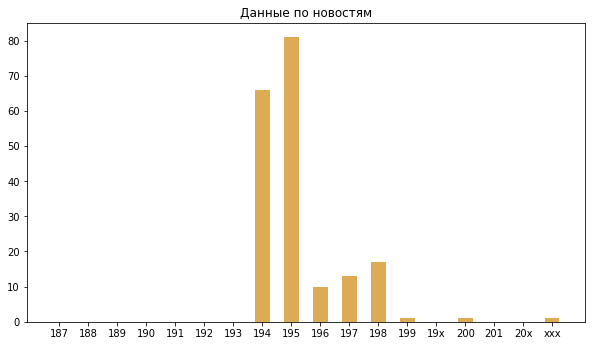

In [ ]:
plt.get_cmap("viridis")
plt.rcParams["figure.figsize"] = (10,5.5)
X = results.index
Y = results['новости']
fig, ax = plt.subplots()
ax.bar(X,Y, width = 0.5, color = '#ddaa55')
ax.set_title('Данные по новостям')
fig.show()
#plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/news')